# Common ML Tasks in SciKit Learn

[Scikit Learn Docs](https://scikit-learn.org/stable/index.html)

## Installation

Colab has intuitive python integrations, so this section is not too complex.

To test your installation of Scikit Learn, uncomment and run the following code snippet:

In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.9/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


## Loading a dataset

Let's start by loading in a dataset to work with. For these examples, we'll be using the Palmer Penguins dataset. Run the code snippets below to install and load our lovely penguins!

In [ ]:
pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from palmerpenguins import load_penguins
from sklearn import datasets
penguins = load_penguins()

## Getting to Know Your Dataset + Simple Data Visualizations

First, let's get to know our dataset and walk through some basic functionality of examining and visualizing data in SKlearn. <br>

We can use `.head(n)`, where `n` is the number of values to print, to visualize a table for the first couple of values of our data. This can be helpful to view a snapshot of the data in your set in an elegant overview, but may not be indicative of the values in the dataset as a whole.

In [ ]:
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


Likewise, we can use `.tail(n)` to visualize some of the last values in the dataset. Here, we'll look at the last few values of the penguins dataset.

In [ ]:
penguins.tail(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
334,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male,2009
335,Chinstrap,Dream,45.6,19.4,194.0,3525.0,female,2009
336,Chinstrap,Dream,51.9,19.5,206.0,3950.0,male,2009
337,Chinstrap,Dream,46.8,16.5,189.0,3650.0,female,2009
338,Chinstrap,Dream,45.7,17.0,195.0,3650.0,female,2009
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


Another important way to examine data is `.dtypes`, which will return each feature of the data and its type.

In [ ]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

SKlearn often requires you to manually call features based on their name as a string, i.e. `"species"`. You can quickly view all of the features as strings using `.columns`.

In [ ]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

One way you could use said feature names is to view all of the unique values in a feature. `.unique()` will return all of the unique values in a `dataset[feature]`.

In [ ]:
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

You can use `.describe()` to return some descriptive features of the data - such as the count, mean, standard, minimum... and so on.

In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


## Classification Model - Decision Trees

This example will demonstrate how the SKLearn library can be used to create decision trees. We'll be training and testing a model to predict the species of penguins.

### Train/Test Data Sets

First, we need to split our data into train/test sets. We can use the train_test_split module to do it for us!

> Our X values will be the train/test values for our data (that is, the size measurements of the penguins).<br>
> Our Y values will be the train/test values for our target (that is, species).

Penguins has a convenient little function `dropna()` that can properly prune off NaN values from our dataset. This can help for models that cannot take missing data.

Our `random_state` is 4 - which is an arbitrary randomizer seed that allows for data replication. 

We set `train_size` to 0.8 as we'll be training on an 80/20 split, where 80% of our data will be the train set, and 20% of our data will be the test set.<br>

`shuffle = True` will shuffle our data before spilling it.

In [ ]:
from sklearn.model_selection import train_test_split

penguins_pruned = penguins.dropna()

features = penguins_pruned.drop(['species', 'island', 'sex'], axis = 1).columns
target = 'species'

x, y = penguins_pruned[features], penguins_pruned[target]

x_train, x_test, y_train, y_test = train_test_split(x, y,
                               random_state = 4,
                               train_size = 0.8, 
                               shuffle = True)

### Building a DecisionTreeClassifier

Great! Our data has been processed and is ready to build our model.

We'll create a DecisionTreeClassifier using `tree.DecisionTreeClassifier()`.
Then, we'll train (or, well, *fit*) it on our train sets using `fit(x_train, y_train)`. 

Lastly, we create a prediction by using `predict(x_test)` to predict using our test dataset.

In [ ]:
from sklearn import tree

penguins_classifier = tree.DecisionTreeClassifier()
penguins_classifier = penguins_classifier.fit(x_train, y_train)

prediction = penguins_classifier.predict(x_test)

## Evaulating Performance

We can measure the performance of our model by using the metrics library's `accuracy_score`, a measure of the percent accuracy. 0% is poor accuracy, while 100% is good accuracy.

Here, we're comparing the actual y values of the test data we predicted on to what our model predicted.

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.9402985074626866


95% of our data was classified accurately - that's pretty good!

However, it should be noted that we don't actually know if this is an accurate representation of how well our model is performing.

This is because of "lucky" vs "unlucky" splits. It seems like we got a pretty lucky split using our seed of 4, however, we could have gotten significantly less accurate classifications if we'd chosen a different seed. 

So how do we get an accurate representation of this model's performance?



## Resampling Methods

There are various ways to resample the dataset for a model, which can help us get a better performance measure for a model. Below are examples of popular resampling methods and how they are implemented in SKlearn.

#### Holdout/Train-Test Split

> We're already familiar with Holdout resampling. Holdout resampling splits the data into train/test splits, where the model is trained on the train set and tested on the test set. The most common split is a 80% train 20% test split.

>It accepts the parameters:
- `*arrays` - the arrays to train/test on
- `test_size` - Specify the % of data to test on*
- `train_size` - Specify the % of data to train on*
- `random_state` - A numeric state that allows for data replication
- `shuffle` - True/False, shuffles data
- `stratify` - Splits data in a stratified fashion

> **You should only need one of these.*

In [ ]:
sklearn.model_selection.train_test_split(*arrays, test_size=20, train_size=None, random_state=4, shuffle=True, stratify=None)

NameError: ignored

#### K-fold Cross Validation

> This is considered the 'basic' approach to resampling by SKLearn. Here, the training set is split into `n` smaller sets. The performance measure reported by k-fold cross-validation is then the average of the values computed in the loops, which are executed as follows:

> - A model is trained using `n-1` of the folds as training data.
- The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy). 

>It accepts the parameters:
- `n_splits` - number of folds
- `shuffle` - True/False, shuffles data
- `random_state` - A numeric state that allows for data replication

In [ ]:
sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)

#### Repeated Cross Validation

> Repeated Cross Validation repeats K-Fold Cross Validation `n` times with different randomization in each repetition.

>It accepts the parameters:
- `n_splits` - number of folds
- `n_repeats` - number of times to repeat K-Folds
- `random_state` - A numeric state that allows for data replication


In [ ]:
sklearn.model_selection.RepeatedKFold(*, n_splits=5, n_repeats=10, random_state=None)



#### Bootstrap

> Bootstrap samples from the dataset using repeated samples from a dataset with replacement.

>It accepts the parameters:
- `n` - total # of elements in the dataset
- `n_bootstaps` - total # of bootstrapping iterations
- `n_train` - if an int, # of sample to include. if a float, proportion of dataset to include in the test set.
- `random_state` - A numeric state that allows for data replication.

In [ ]:
sklearn.cross_validation.Bootstrap(n, n_bootstraps=3, n_train=0.5, n_test=None, random_state=None)

#### Leave-one-out

> Leave one out provides train/test indices to split data in train/test sets. Each sample is used once as a test set, while the remaining samples form the training set.

> LOO has no parameters.

In [ ]:
sklearn.model_selection.LeaveOneOut

###Using Resampling to Train a Model

Let's use K-fold cross-validation to train a model! We'll be using a K-fold with 10 folds.

Here, we shuffle our data, in order to randomly pick datapoints. This is helpful as the penguins dataset is organized by species, and we want a good distribution of datapoints for our resampling.

Then, for our resampling, we'll use `cross_val_score` to compute the overall evaluation score using the mean of our 10 scores.

Afterwards, we'll print the resulting accuracies, their mean, and standard deviation.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf_penguins = KFold(n_splits = 10, shuffle = True, random_state = 4)
resample_results = cross_val_score(penguins_classifier, x, y, cv = kf_penguins)

print(resample_results)
print("Mean:", resample_results.mean())
print("Standard Dev:", resample_results.std())

[0.88235294 1.         0.97058824 0.96969697 1.         0.93939394
 0.96969697 0.96969697 0.96969697 0.96969697]
Mean: 0.9640819964349376
Standard Dev: 0.03173218454796359


We can take the mean score (0.96) as the evaluation score for our decision tree classifier. 

###Evaluating Model Performance Using A Confusion Matrix

We can also use a confusion matrix to get a better idea of how our model has performed. It shows how many datapoints were correctly and incorrectly classified. 

`confusion_matrix` accepts the parameters:

- `y_true` - the true y values.
- `y_pred` - the predicted y values.

In this case, `y_true` are the true `y_test` values, and `y_pred` is pur `prediction`.

We'll then display our confusion matrix. `ConfusionMatrixDisplay` accepts the parameters:
- `confusion_matrix` - the confusion matrix
- `display_labels` - the labels. Typically, we use the `classes_` of the classifier.



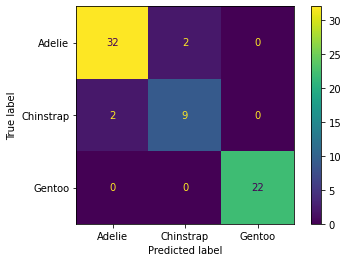

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pengs_confusion = confusion_matrix(y_test, prediction)
cm_display = ConfusionMatrixDisplay(confusion_matrix = pengs_confusion, display_labels = penguins_classifier.classes_)
cm_display.plot()

##Benchmarking
Benchmarking is the comparaison of different learners on a single task or multiple tasks. The end goal of benchmaking is to identify the best performing learner for a given problem or task. <br>
scikitlearn does not have a built-in method for benchmarking. We do this by performing the following steps:

*   storing datasets in a list 
*   storing learners in a list
*   selecting the resampling method we're going to use 
*   iterating over the datasets and the learners and store the score in each iteration



In [ ]:
from prettytable import PrettyTable
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

myTable = PrettyTable(["dataset", "learner", "score"])
datasets = [load_iris(), load_wine(), load_breast_cancer()]
models = [DecisionTreeClassifier(), GaussianNB()]
resultsForPloting = []

for dataset in datasets:
    X, y = dataset.data, dataset.target
    for model in models:
      row = []
      row.append(dataset.DESCR.split("\n")[0][:-1])
      row.append(model.__class__.__name__)
      kf = KFold(n_splits = 10, shuffle = True, random_state = 4)
      resample_results = cross_val_score(model, X, y, cv = kf)
      resultsForPloting.append(resample_results)
      row.append(round(resample_results.mean(),4))
      myTable.add_row(row);

print(myTable)

+---------------------------+------------------------+--------+
|          dataset          |        learner         | score  |
+---------------------------+------------------------+--------+
|      .. _iris_dataset     | DecisionTreeClassifier | 0.9467 |
|      .. _iris_dataset     |       GaussianNB       | 0.9533 |
|      .. _wine_dataset     | DecisionTreeClassifier | 0.8938 |
|      .. _wine_dataset     |       GaussianNB       | 0.9722 |
| .. _breast_cancer_dataset | DecisionTreeClassifier | 0.9297 |
| .. _breast_cancer_dataset |       GaussianNB       | 0.9385 |
+---------------------------+------------------------+--------+


>To visualize the performance of each learner, we can use `matplotlib()` to generate a box plot 


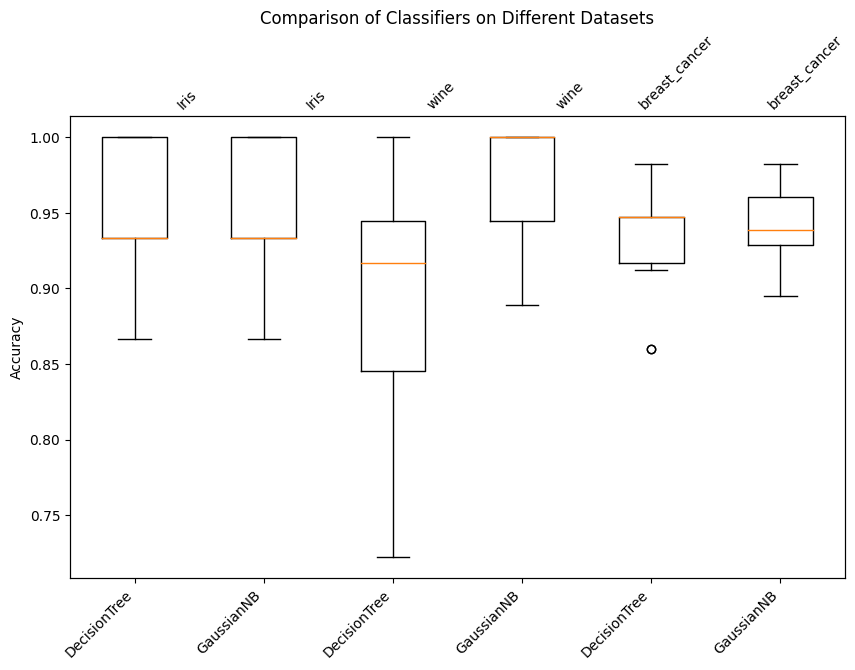

In [ ]:
import matplotlib.pyplot as plt
classifiers = ['DecisionTree', 'GaussianNB', 'DecisionTree', 'GaussianNB', 'DecisionTree', 'GaussianNB']
datasets = ['Iris', 'Iris', 'wine','wine','breast_cancer','breast_cancer']

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(resultsForPloting)
ax.set_xticklabels(classifiers, rotation=45, ha='right')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Classifiers on Different Datasets')

ax2 = ax.twiny()
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(datasets, rotation=45, ha='right')
ax2.tick_params(axis='x', which='both', length=0)

plt.show()
